# Plot of sorted hallmark NES values

Script related to figure 3g

### Aim:
- Plot sorted hallmark NES derived from ssGSEA analysis on t-statistic values of differential expression analysis

In [1]:
home = "~/git_repos/HGSOC_TME_Heterogeneity/"

## Import packages

In [3]:
import numpy as np
import pylab as pl
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import normaltest
from statsmodels.robust import mad
from statsmodels.graphics.gofplots import qqplot

In [4]:
home = "~/git_repos/HGSOC_TME_Heterogeneity/"

## Load hallmark NES after differential expression analysis

In [5]:
ls ../../Data/3/HallmarksStromaImmune_NES_after_DiffExp.txt

../../Data/3/HallmarksStromaImmune_NES_after_DiffExp.txt


In [6]:
file_hallmark_NES = home + 'Data/3/HallmarksStromaImmune_NES_after_DiffExp.txt'

hallmark_NES = pd.read_csv(file_hallmark_NES,
                           sep='\t',
                           index_col='Term')

hallmark_NES.head()

,Hallmark_NES
Term,
HALLMARK_TNFA_SIGNALING_VIA_NFKB,-0.190627
HALLMARK_HYPOXIA,0.013684
HALLMARK_CHOLESTEROL_HOMEOSTASIS,-0.024618
HALLMARK_MITOTIC_SPINDLE,0.285642
HALLMARK_WNT_BETA_CATENIN_SIGNALING,0.411188


### Transform data to approach normal distribution

In [7]:
hallmark_NES['exponential_NES'] = np.exp(hallmark_NES['Hallmark_NES'])

hallmark_NES.head()

,Hallmark_NES,exponential_NES
Term,,
HALLMARK_TNFA_SIGNALING_VIA_NFKB,-0.190627,0.826441
HALLMARK_HYPOXIA,0.013684,1.013778
HALLMARK_CHOLESTEROL_HOMEOSTASIS,-0.024618,0.975683
HALLMARK_MITOTIC_SPINDLE,0.285642,1.330616
HALLMARK_WNT_BETA_CATENIN_SIGNALING,0.411188,1.508609


## Evaluate normality distribution of NES data

### Visual normality checks

#### Density plot and histogram

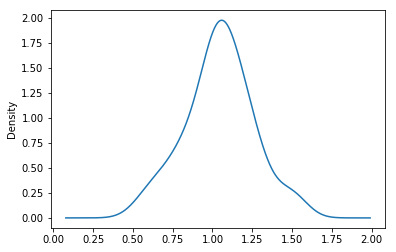

In [8]:
hallmark_NES['exponential_NES'].plot(kind='KDE')

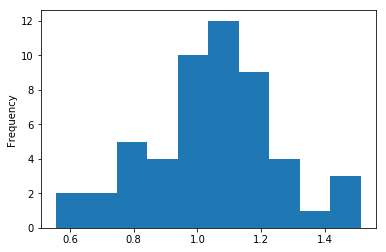

In [9]:
hallmark_NES['exponential_NES'].plot(kind='hist',
                                     bins=10)

#### Q-Q plot

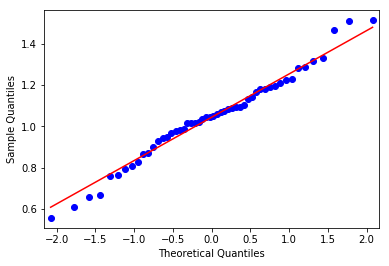

In [10]:
qqplot(hallmark_NES['exponential_NES'].sort_values(), line='s')

plt.show()

### Statistical Normality Tests

#### Shapiro-Wilk test

In [11]:
stat, p = shapiro(hallmark_NES['exponential_NES'])

alpha = 0.05
if p > alpha:
    print('p-value = '+str(p))
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('p-value = '+str(p))
    print('Sample does not look Gaussian (reject H0)')

p-value = 0.6430591344833374
Sample looks Gaussian (fail to reject H0)


#### D’Agostino’s K^2 test

In [12]:
stat, p = normaltest(hallmark_NES['exponential_NES'])

alpha = 0.05
if p > alpha:
    print('p-value = '+str(p))
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('p-value = '+str(p))
    print('Sample does not look Gaussian (reject H0)')

p-value = 0.8422704913175552
Sample looks Gaussian (fail to reject H0)


#### Anderson-Darling test

<p>
Critical values in a statistical test are a range of pre-defined significance boundaries at which the H0 can be failed to be rejected if the calculated statistic is less than the critical value. Rather than just a single p-value, the test returns a critical value for a range of different commonly used significance levels.
</p>
<p>
We can interpret the results by failing to reject the null hypothesis that the data is normal if the calculated test statistic is less than the critical value at a chosen significance level.
</p>

In [13]:
result = anderson(list(hallmark_NES['exponential_NES']),
                  dist='norm')

print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.326
15.000: 0.539, data looks normal (fail to reject H0)
10.000: 0.614, data looks normal (fail to reject H0)
5.000: 0.737, data looks normal (fail to reject H0)
2.500: 0.860, data looks normal (fail to reject H0)
1.000: 1.023, data looks normal (fail to reject H0)


## Generate normal distribution for visual comparison

In [14]:
Exp_NES_sorted = list(hallmark_NES['exponential_NES'].sort_values())

fit = stats.norm.pdf(Exp_NES_sorted,
                     np.mean(Exp_NES_sorted),
                     np.std(Exp_NES_sorted))

In [15]:
MIN = min(hallmark_NES['Hallmark_NES'])

MIN

-0.5860662273032939

In [16]:
MAX = max(hallmark_NES['Hallmark_NES'])

MAX

0.413933772696706

In [17]:
num_ticks = round(round(MAX+0.1, 1) - round(MIN-0.1, 1), 1) / 0.1

num_ticks

11.999999999999998

In [18]:
MIN_exp = min(hallmark_NES['exponential_NES'])

MIN_exp

0.5565121768892656

In [19]:
MAX_exp = max(hallmark_NES['exponential_NES'])

MAX_exp

1.5127569377542764

In [25]:
num_ticks = round(round(round(MAX+0.1, 1) - round(MIN-0.1, 1), 1) / 0.1)

num_ticks

12

In [26]:
ticks_linear = [round(i, 1) for i in np.linspace(round(MIN-0.1, 1),round(MAX+0.1, 1), num_ticks)]

ticks_linear

[-0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

In [27]:
ticks_exp = np.exp(ticks_linear)

ticks_exp

array([0.4965853 , 0.54881164, 0.60653066, 0.67032005, 0.74081822,
       0.81873075, 1.        , 1.10517092, 1.22140276, 1.34985881,
       1.4918247 , 1.64872127])

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2446: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


[[Text(0,0,'-0.7'),
  Text(0,0,'-0.6'),
  Text(0,0,'-0.5'),
  Text(0,0,'-0.4'),
  Text(0,0,'-0.3'),
  Text(0,0,'-0.2'),
  Text(0,0,'-0.0'),
  Text(0,0,'0.1'),
  Text(0,0,'0.2'),
  Text(0,0,'0.3'),
  Text(0,0,'0.4'),
  Text(0,0,'0.5')]]

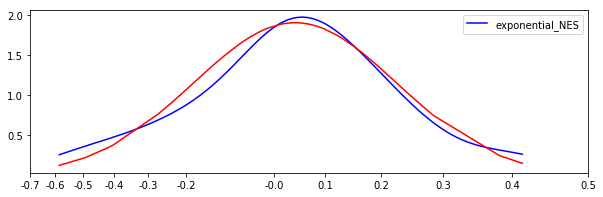

In [28]:
fig = plt.figure(figsize=(10,3))

ax = sns.kdeplot(hallmark_NES['exponential_NES'],
                 cut=0,
                 c='b')
    
pl.plot(Exp_NES_sorted,fit,'-',c='r')



ax.set_xticks(ticks_exp)
ax.set(xticklabels=ticks_linear)

In [29]:
fig = ax.get_figure()

FILE = "../../Figures/main/3/panels/3g_hallmarks_NES_t_statistic_dist.pdf"

fig.savefig(FILE, bbox='tight')

## Plot sorted NES

### Define and find outliers using z-score and modified z-score

In [30]:
def outliers_modified_z_score(ys, threshold=float):

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    
    return np.where(np.abs(modified_z_scores) > threshold)

def outliers_z_score(ys, threshold=float):

    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)

In [31]:
outliers = outliers_modified_z_score(hallmark_NES['exponential_NES'], 1.96)

hallmark_NES.iloc[outliers]

,Hallmark_NES,exponential_NES
Term,,
HALLMARK_WNT_BETA_CATENIN_SIGNALING,0.411188,1.508609
HALLMARK_G2M_CHECKPOINT,0.382139,1.465416
HALLMARK_INTERFERON_ALPHA_RESPONSE,-0.402744,0.668483
HALLMARK_INTERFERON_GAMMA_RESPONSE,-0.417773,0.658511
HALLMARK_MYC_TARGETS_V2,0.413934,1.512757
StromalSignature,-0.494474,0.609891
ImmuneSignature,-0.586066,0.556512


In [32]:
hallmark_NES['Term'] = hallmark_NES.index

In [33]:
hallmark_NES.sort_values(by='exponential_NES',
                         ascending=False,
                         inplace=True)

hallmark_NES.head()

,Hallmark_NES,exponential_NES,Term
Term,,,
HALLMARK_MYC_TARGETS_V2,0.413934,1.512757,HALLMARK_MYC_TARGETS_V2
HALLMARK_WNT_BETA_CATENIN_SIGNALING,0.411188,1.508609,HALLMARK_WNT_BETA_CATENIN_SIGNALING
HALLMARK_G2M_CHECKPOINT,0.382139,1.465416,HALLMARK_G2M_CHECKPOINT
HALLMARK_MITOTIC_SPINDLE,0.285642,1.330616,HALLMARK_MITOTIC_SPINDLE
HALLMARK_E2F_TARGETS,0.275921,1.317743,HALLMARK_E2F_TARGETS


In [34]:
med = hallmark_NES['exponential_NES'].median()
MAD = mad(hallmark_NES['exponential_NES'])

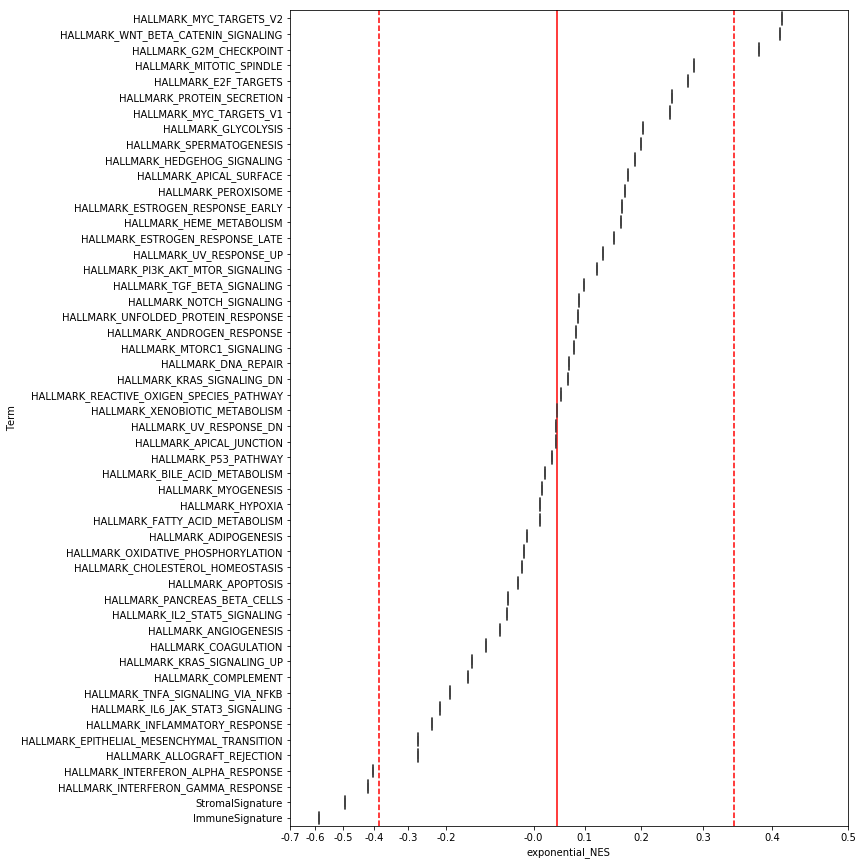

In [36]:
fig = plt.figure(figsize=(10,15))

ax = sns.boxplot(x='exponential_NES',
                 y='Term',
                 data=hallmark_NES)

plt.axvline(x=med,alpha=1,c='r')
plt.axvline(x=med+(1.96*MAD),alpha=1,c='r',ls='--')
plt.axvline(x=med-(1.96*MAD),alpha=1,c='r',ls='--')

ax.set_xticks(ticks_exp)
ax.set(xticklabels=ticks_linear)

plt.show()

In [37]:
fig = ax.get_figure()

FILE = "../../Figures/main/3/panels/3g_hallmarks_NES_t_statistic_medians.pdf"

fig.savefig(FILE, bbox='tight')

# End script